# Imports

In [1]:
import cv2
import numpy as np
import imutils
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt

## Load Image

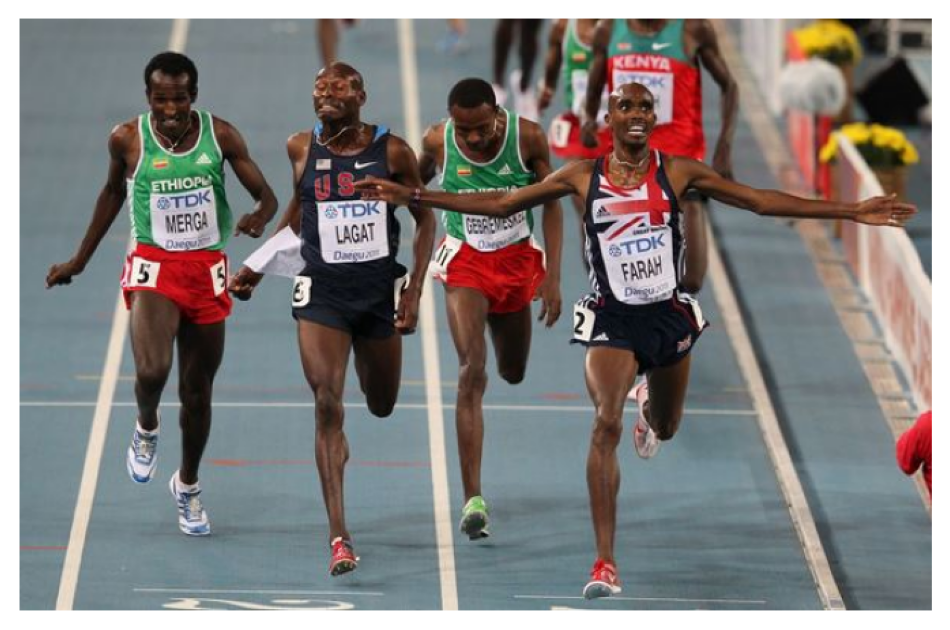

In [2]:
# Load the image
imagePath = "HOGpedestrianDetection_4_1.png"  # Replace with the actual path
image = cv2.imread(imagePath)

# Display the image using matplotlib
plt.figure(figsize=(12, 10))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Create and Configure HOG Descriptor

In [3]:
# Create HOG descriptor with default parameters
hog = cv2.HOGDescriptor()

# Use pre-trained SVM for people detection
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

## Detect People in Image

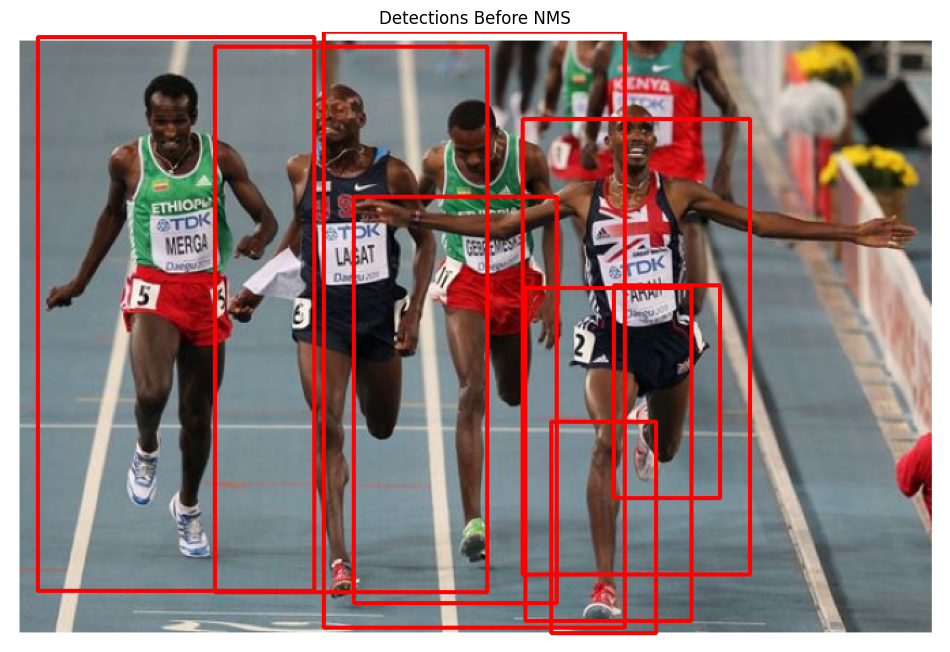

In [4]:
# Perform multi-scale detection
(rects, weights) = hog.detectMultiScale(image,
                                        winStride=(4, 4),
                                        padding=(8, 8),
                                        scale=1.1)

# Draw initial detections
orig = image.copy()
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show detection before suppression
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title("Detections Before NMS")
plt.axis("off")
plt.show()

## Apply Non Maxima Suppression

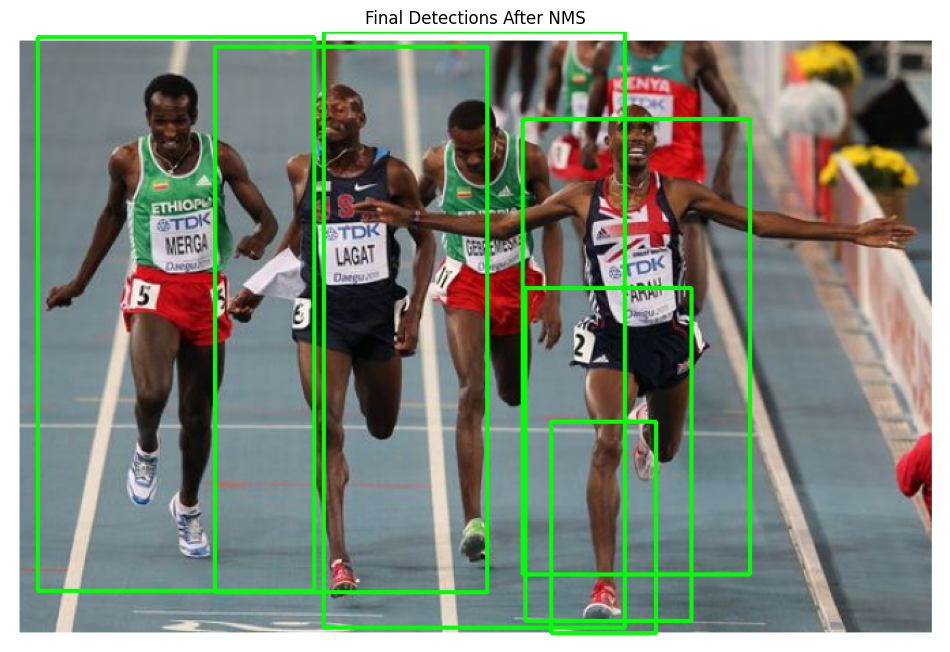

[INFO] HOGpedestrianDetection_4_1.png: 8 original boxes, 6 after suppression


In [5]:
# Convert rects format from (x, y, w, h) to (x1, y1, x2, y2)
rects_np = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects_np, probs=None, overlapThresh=0.65)

# Draw final bounding boxes after NMS
nms_image = image.copy()
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(nms_image, (xA, yA), (xB, yB), (0, 255, 0), 2)

plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(nms_image, cv2.COLOR_BGR2RGB))
plt.title("Final Detections After NMS")
plt.axis("off")
plt.show()

# Print info
filename = imagePath.split("/")[-1]
print(f"[INFO] {filename}: {len(rects)} original boxes, {len(pick)} after suppression")